In [3]:
%matplotlib notebook

import csv
import itertools
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Position Analysis

## based on generation

<IPython.core.display.Javascript object>


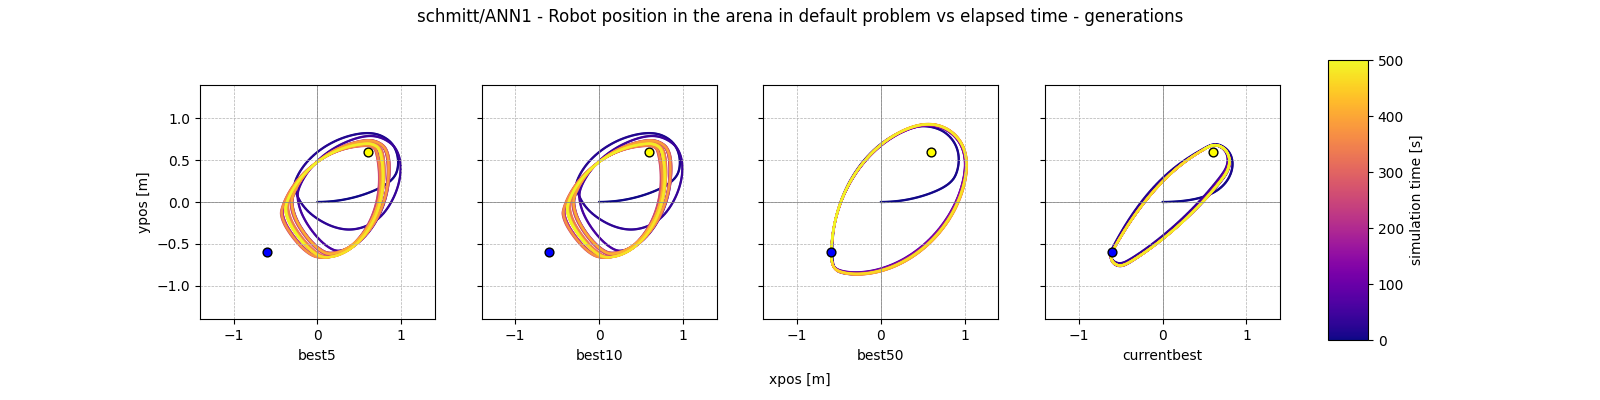

<IPython.core.display.Javascript object>


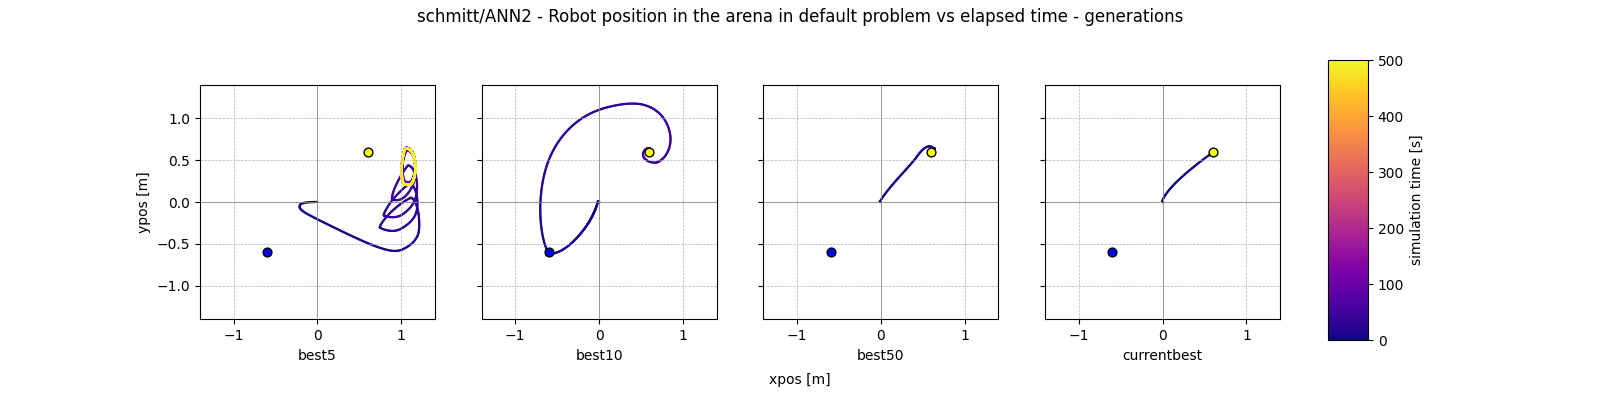

<IPython.core.display.Javascript object>


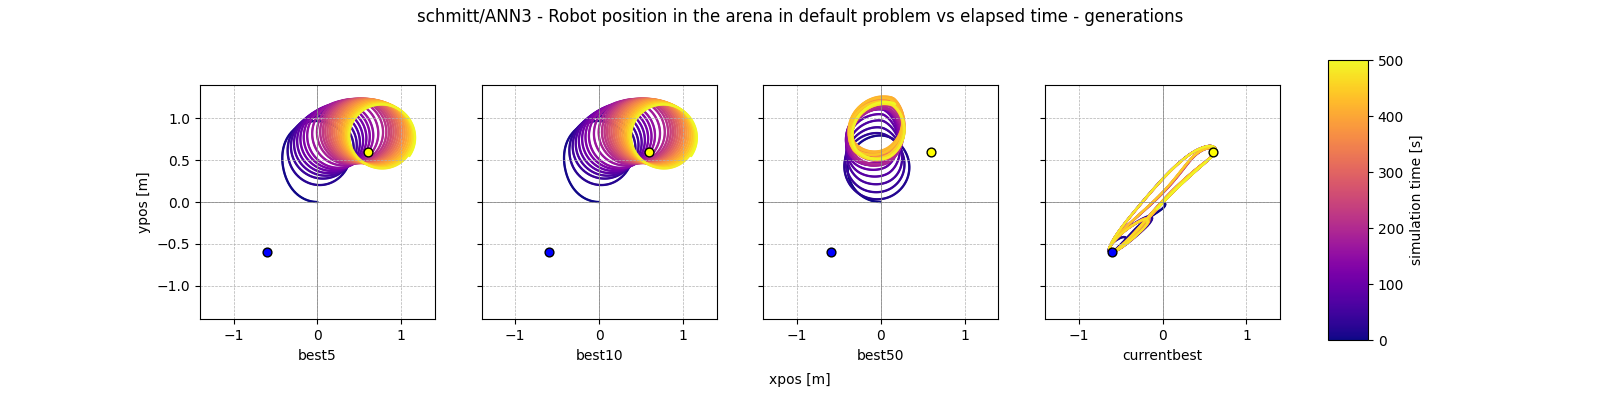

<IPython.core.display.Javascript object>


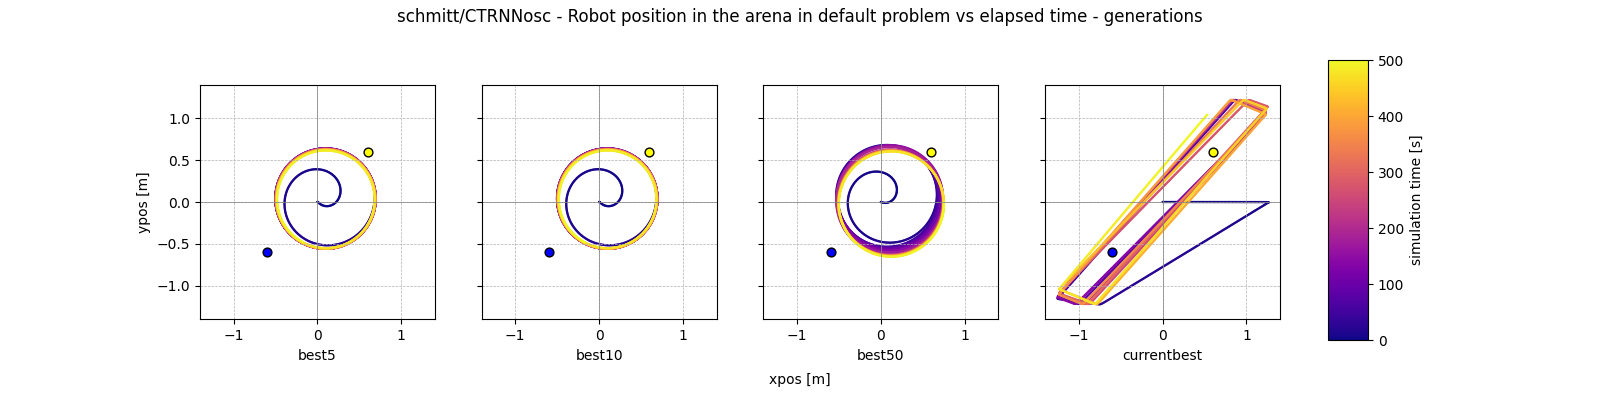

<IPython.core.display.Javascript object>


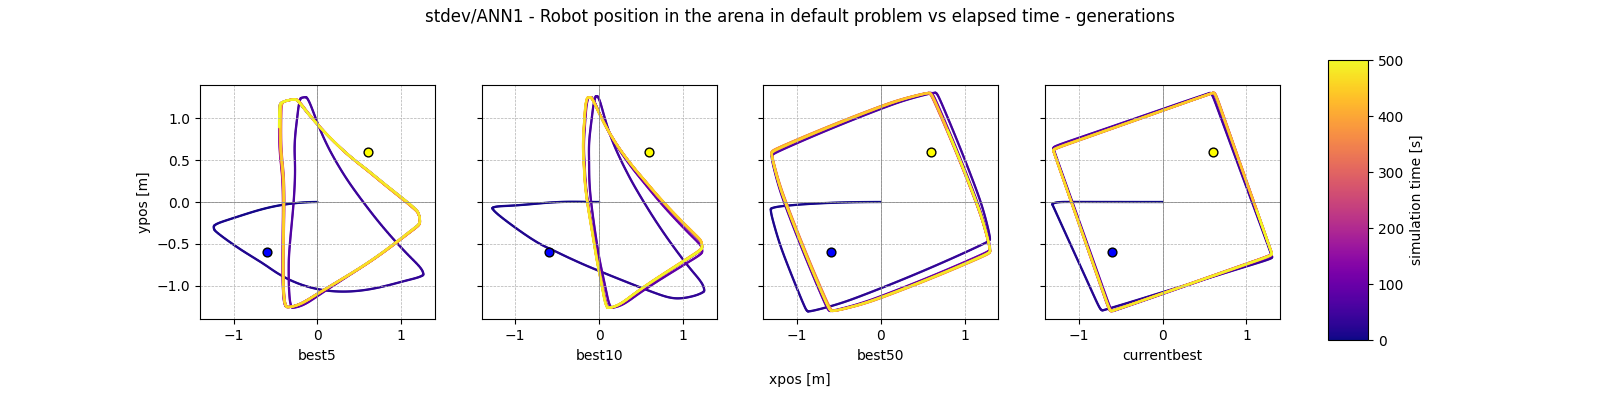

<IPython.core.display.Javascript object>


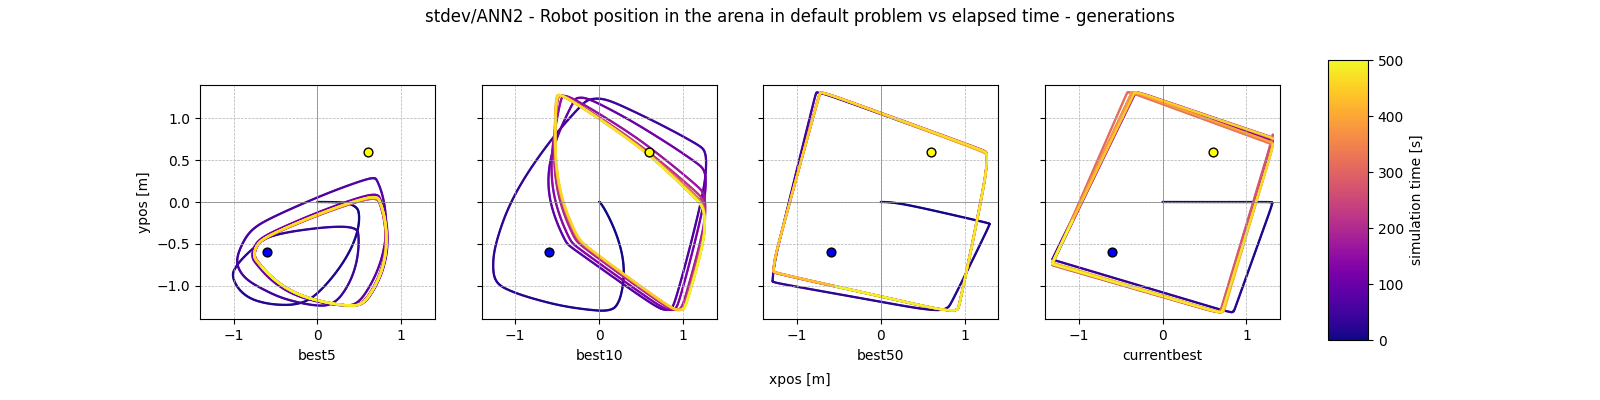

In [4]:
funcs = ["schmitt", "stdev"]
nn_archs = ["ANN1", "ANN2", "ANN3", "CTRNNosc"]

exps_comb_tuples = list(itertools.product(funcs, nn_archs))
exps_comb_proc = []

for i, tup in enumerate(exps_comb_tuples):
    if tup[0] == "stdev" and ((not tup[1].startswith("ANN")) or (tup[1] == "ANN3")):
        pass
    else:
        exps_comb_proc.append(tup)
del exps_comb_tuples

for func, nn in exps_comb_proc:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=mpl.figure.figaspect(0.25))

    ax1.set_xlim(-1.4, 1.4)
    ax1.set_ylim(-1.4, 1.4)

    for ax, ch in zip(fig.get_axes(), ["best5", "best10", "best50", "currentbest"]):
        path = f"/home/marcos/OneDrive/home/ETSIT/tercero/irin/o2/sim/code/automations/outputFiles_{func}_irsim-{nn}_{ch}/robotPosition"
        df = pd.read_csv(path, sep=" ", header=0, names=["time", "xpos", "ypos", "hdg"])
        line = pd.DataFrame({"time": 0, "xpos": 0, "ypos": 0, "hdg": 0}, index=[0])
        df = pd.concat([line, df.iloc[:]]).reset_index(drop=True)
        df = df[:5002]
        df.plot(kind="scatter", ax=ax, x="xpos", y="ypos", c="time", cmap="plasma", s=0.5, colorbar=False)
        ax.scatter(-0.6, -0.6, s=40, c="blue", edgecolors="black");
        ax.scatter(0.6, 0.6, s=40, c="yellow", edgecolors="black");

        ax.grid(linestyle='--', linewidth=0.5, which="major")
        ax.grid(linestyle='-.', linewidth=0.25, which="minor")
        ax.axline((0, 0), slope=0, c="grey", lw=0.5)
        ax.axline((0, 0), (0,1), c="grey", lw=0.5)
        ax.set_aspect('equal', adjustable='box')
        ax.set_ylabel("ypos [m]")
        ax.set_xlabel(ch)

    fig.subplots_adjust(right=0.8)
    
    fig.text(0.5, 0.04, 'xpos [m]', ha='center')
    cbar_ax = fig.add_axes([0.83, 0.15, 0.025, 0.7])
    cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
    cbar.set_label("simulation time [s]")
    
    fig.suptitle(f'{func}/{nn} - Robot position in the arena in default problem vs elapsed time - generations')
    fig.savefig(f"figures/{nn.lower()}_{func}_evol.pdf", bbox_inches='tight')

## based on environment

<IPython.core.display.Javascript object>


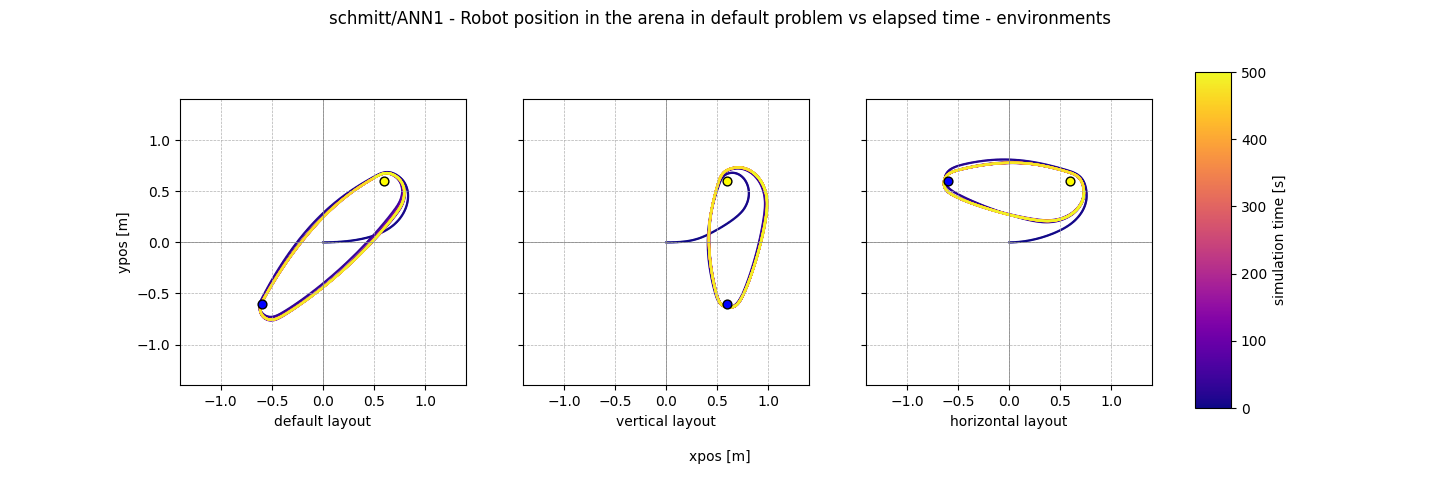

<IPython.core.display.Javascript object>


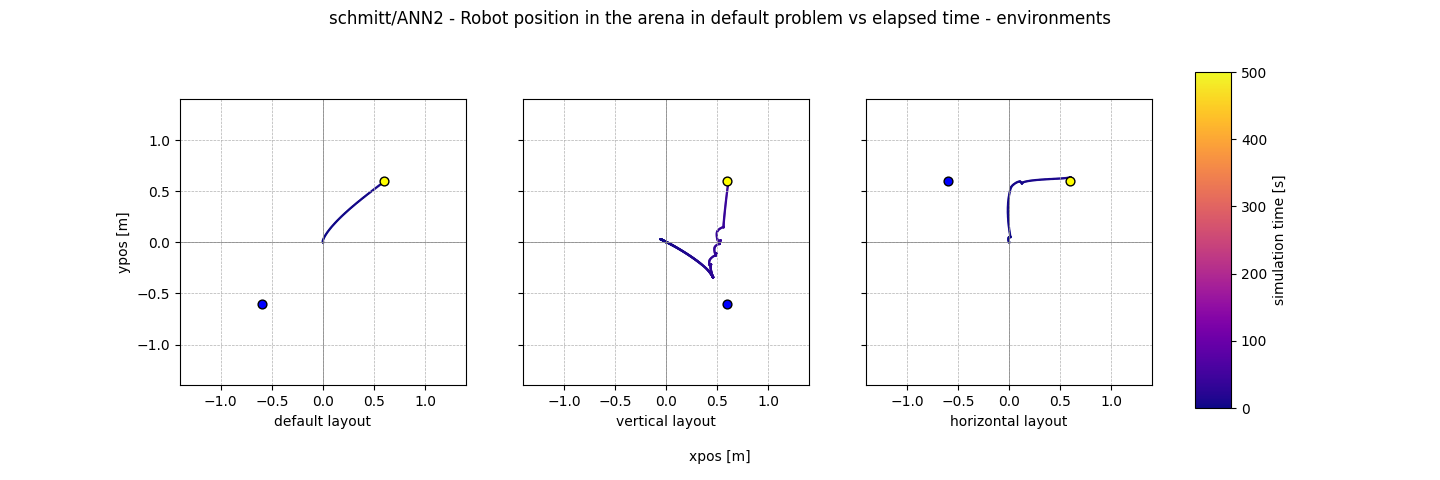

<IPython.core.display.Javascript object>


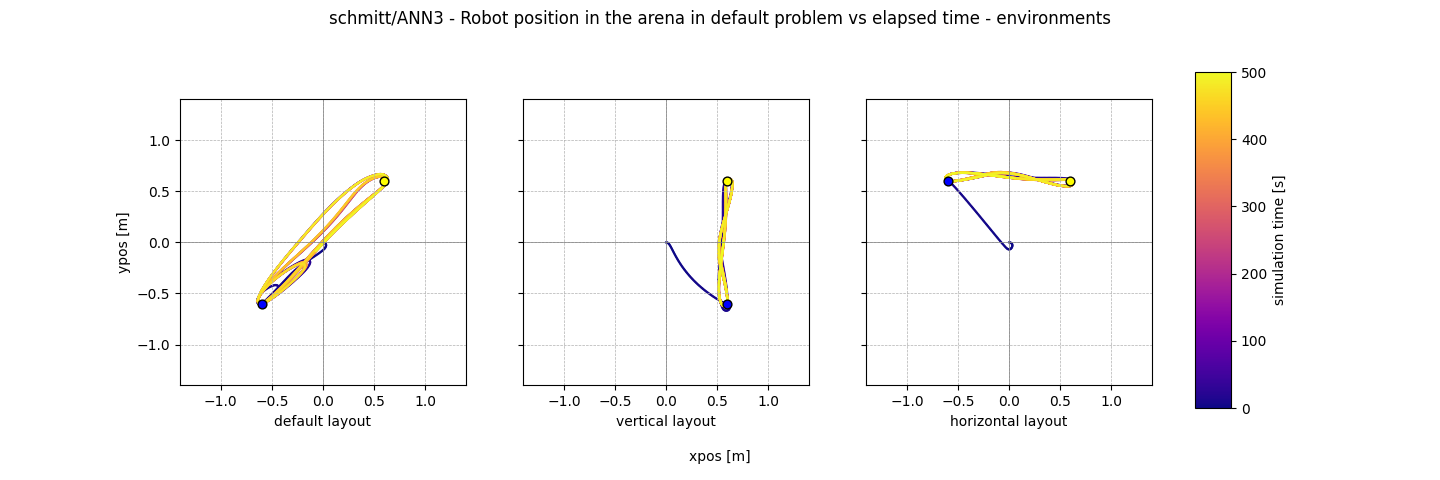

<IPython.core.display.Javascript object>


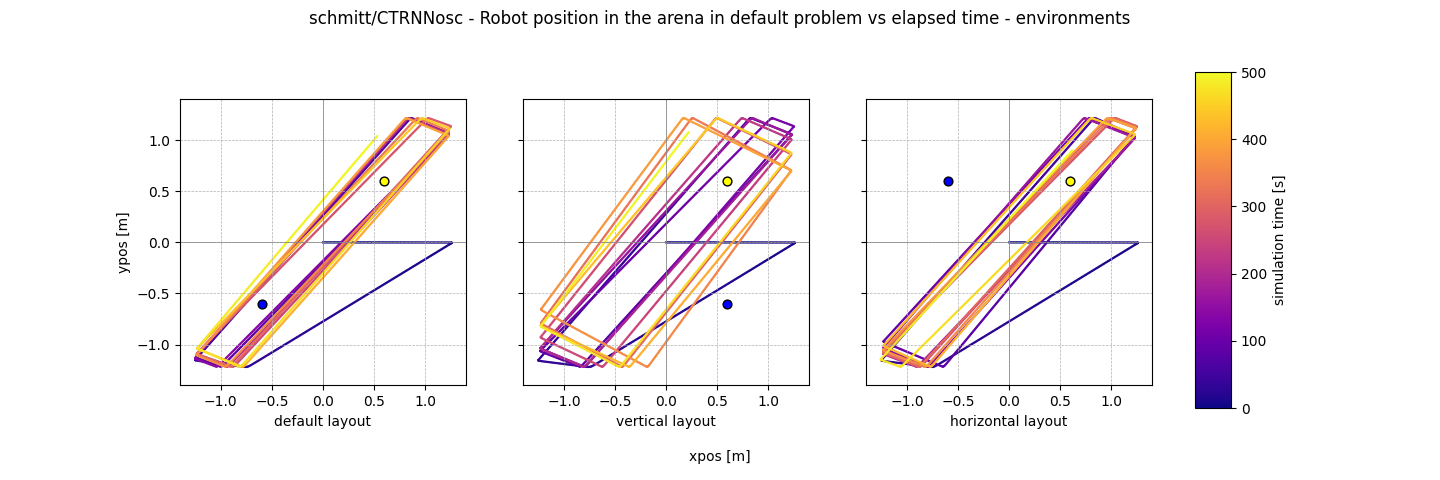

<IPython.core.display.Javascript object>


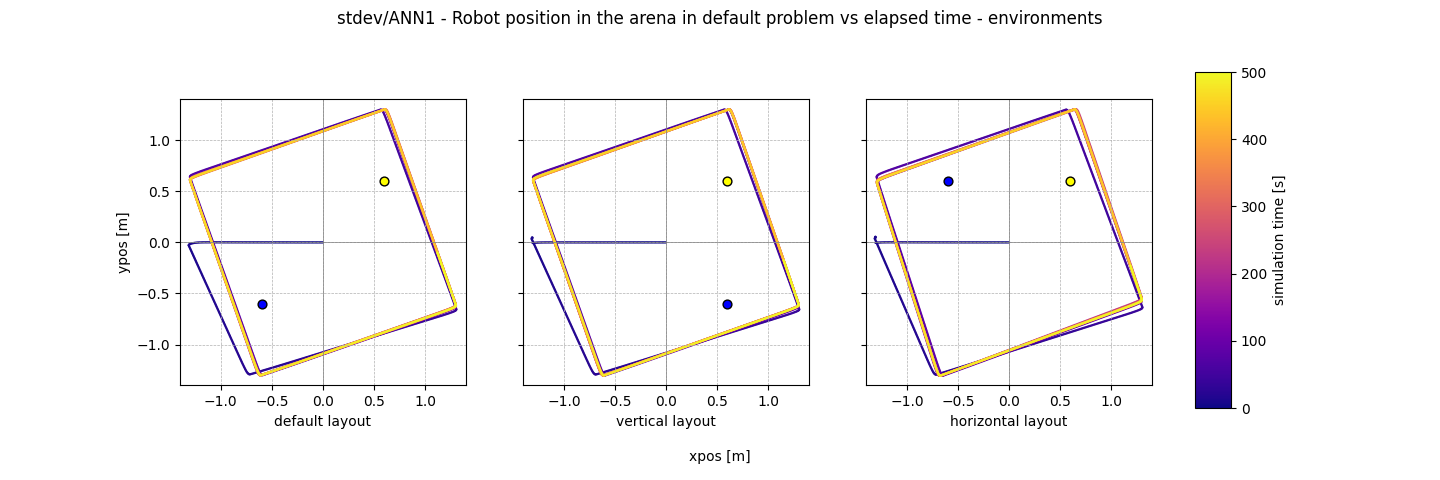

<IPython.core.display.Javascript object>


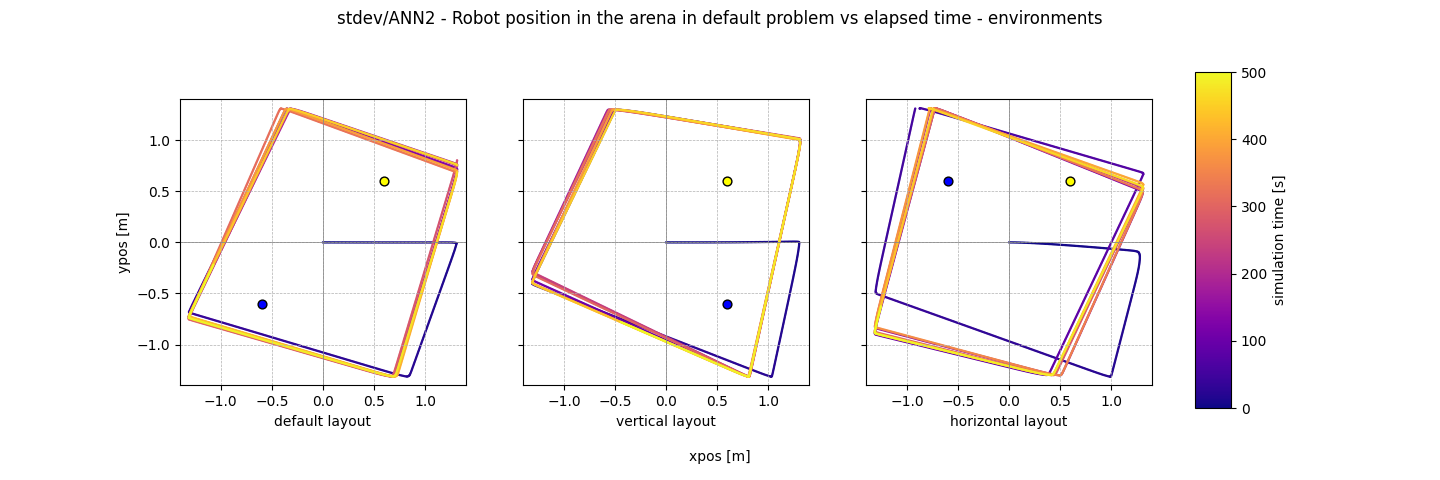

In [5]:
funcs = ["schmitt", "stdev"]
nn_archs = ["ANN1", "ANN2", "ANN3", "CTRNNosc"]

exps_comb_tuples = list(itertools.product(funcs, nn_archs))
exps_comb_proc = []

for i, tup in enumerate(exps_comb_tuples):
    if tup[0] == "stdev" and ((not tup[1].startswith("ANN")) or (tup[1] == "ANN3")):
        pass
    else:
        exps_comb_proc.append(tup)
del exps_comb_tuples

xlabels = {
    "d": "default layout",
    "v": "vertical layout",
    "h": "horizontal layout"
}

for func, nn in exps_comb_proc:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=mpl.figure.figaspect(1/3))

    ax1.set_xlim(-1.4, 1.4)
    ax1.set_ylim(-1.4, 1.4)

    for ax, ch in zip(fig.get_axes(), ["d", "v", "h"]):
        path = f"/home/marcos/OneDrive/home/ETSIT/tercero/irin/o2/sim/code/automations/outputFiles_{func}_irsim-{nn}_{ch}/robotPosition"
        df = pd.read_csv(path, sep=" ", header=0, names=["time", "xpos", "ypos", "hdg"])
        line = pd.DataFrame({"time": 0, "xpos": 0, "ypos": 0, "hdg": 0}, index=[0])
        df = pd.concat([line, df.iloc[:]]).reset_index(drop=True)
        df = df[:5002]
        df.plot(kind="scatter", ax=ax, x="xpos", y="ypos", c="time", cmap="plasma", s=0.5, colorbar=False)
        if ch == "d":
            xm = -1
            ym = -1
        elif ch == "h":
            xm = -1
            ym = 1
        else:
            xm = 1
            ym = -1
        ax.scatter(xm*0.6, ym*0.6, s=40, c="blue", edgecolors="black");
        ax.scatter(0.6, 0.6, s=40, c="yellow", edgecolors="black");

        ax.grid(linestyle='--', linewidth=0.5, which="major")
        ax.grid(linestyle='-.', linewidth=0.25, which="minor")
        ax.axline((0, 0), slope=0, c="grey", lw=0.5)
        ax.axline((0, 0), (0,1), c="grey", lw=0.5)
        ax.set_aspect('equal', adjustable='box')
        ax.set_ylabel("ypos [m]")
        ax.set_xlabel(xlabels[ch])

    fig.subplots_adjust(right=0.8)
    
    fig.text(0.5, 0.04, 'xpos [m]', ha='center')
    cbar_ax = fig.add_axes([0.83, 0.15, 0.025, 0.7])
    cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
    cbar.set_label("simulation time [s]")
    
    fig.suptitle(f'{func}/{nn} - Robot position in the arena in default problem vs elapsed time - environments')
    fig.savefig(f"figures/{nn.lower()}_{func}_arena.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>


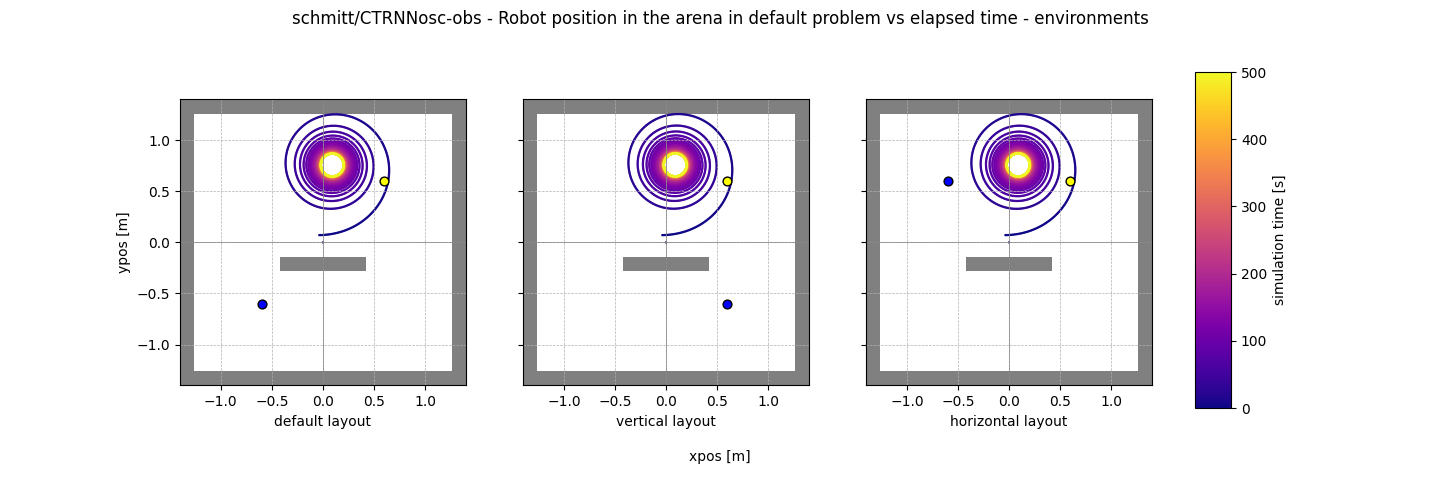

<IPython.core.display.Javascript object>


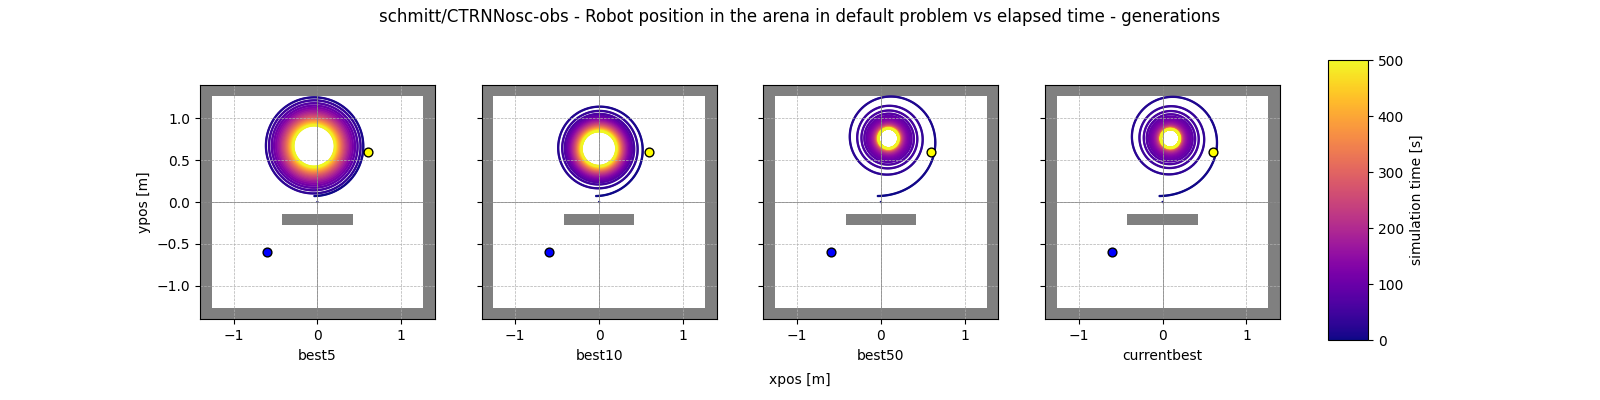

In [13]:
map_str= "%%%%%%%%%%%%%%%%%%%%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%######%%%%%%######%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%##################%"\
"%%%%%%%%%%%%%%%%%%%%"\


for func, nn in [("schmitt", "CTRNNosc-obs")]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=mpl.figure.figaspect(1/3))

    ax1.set_xlim(-1.4, 1.4)
    ax1.set_ylim(-1.4, 1.4)

    for ax, ch in zip(fig.get_axes(), ["d", "v", "h"]):
        path = f"/home/marcos/OneDrive/home/ETSIT/tercero/irin/o2/sim/code/automations/outputFiles_{func}_irsim-{nn}_{ch}/robotPosition"
        df = pd.read_csv(path, sep=" ", header=0, names=["time", "xpos", "ypos", "hdg"])
        line = pd.DataFrame({"time": 0, "xpos": 0, "ypos": 0, "hdg": 0}, index=[0])
        df = pd.concat([line, df.iloc[:]]).reset_index(drop=True)
        df = df[:5002]
        df.plot(kind="scatter", ax=ax, x="xpos", y="ypos", c="time", cmap="plasma", s=0.5, colorbar=False)
        if ch == "d":
            xm = -1
            ym = -1
        elif ch == "h":
            xm = -1
            ym = 1
        else:
            xm = 1
            ym = -1
        ax.scatter(xm*0.6, ym*0.6, s=40, c="blue", edgecolors="black");
        ax.scatter(0.6, 0.6, s=40, c="yellow", edgecolors="black");

        ax.grid(linestyle='--', linewidth=0.5, which="major")
        ax.grid(linestyle='-.', linewidth=0.25, which="minor")
        ax.axline((0, 0), slope=0, c="grey", lw=0.5)
        ax.axline((0, 0), (0,1), c="grey", lw=0.5)
        ax.set_aspect('equal', adjustable='box')
        ax.set_ylabel("ypos [m]")
        ax.set_xlabel(xlabels[ch])
        
        curx = -1.4
        cury = -1.4
        for x in range(20):
            for y in range(20):
                if map_str[x + y * 20] == "%":
                    #print(curx, cury)
                    rect = patches.Rectangle((curx, cury), 1.4/20*2, 1.4/20*2, linewidth=0, facecolor='grey', zorder=-1)
                    ax.add_patch(rect)
                cury = cury + 1.4/20*2
            cury = -1.4
            curx = curx + 1.4/20*2

    fig.subplots_adjust(right=0.8)
    
    fig.text(0.5, 0.04, 'xpos [m]', ha='center')
    cbar_ax = fig.add_axes([0.83, 0.15, 0.025, 0.7])
    cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
    cbar.set_label("simulation time [s]")
    
    fig.suptitle(f'{func}/{nn} - Robot position in the arena in default problem vs elapsed time - environments')
    fig.savefig(f"figures/{nn.lower()}_{func}_arena.pdf", bbox_inches='tight')
    
for func, nn in [("schmitt", "CTRNNosc-obs")]:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=mpl.figure.figaspect(0.25))

    ax1.set_xlim(-1.4, 1.4)
    ax1.set_ylim(-1.4, 1.4)

    for ax, ch in zip(fig.get_axes(), ["best5", "best10", "best50", "currentbest"]):
        path = f"/home/marcos/OneDrive/home/ETSIT/tercero/irin/o2/sim/code/automations/outputFiles_{func}_irsim-{nn}_{ch}/robotPosition"
        df = pd.read_csv(path, sep=" ", header=0, names=["time", "xpos", "ypos", "hdg"])
        line = pd.DataFrame({"time": 0, "xpos": 0, "ypos": 0, "hdg": 0}, index=[0])
        df = pd.concat([line, df.iloc[:]]).reset_index(drop=True)
        df = df[:5002]
        df.plot(kind="scatter", ax=ax, x="xpos", y="ypos", c="time", cmap="plasma", s=0.5, colorbar=False)
        ax.scatter(-0.6, -0.6, s=40, c="blue", edgecolors="black");
        ax.scatter(0.6, 0.6, s=40, c="yellow", edgecolors="black");

        ax.grid(linestyle='--', linewidth=0.5, which="major")
        ax.grid(linestyle='-.', linewidth=0.25, which="minor")
        ax.axline((0, 0), slope=0, c="grey", lw=0.5)
        ax.axline((0, 0), (0,1), c="grey", lw=0.5)
        ax.set_aspect('equal', adjustable='box')
        ax.set_ylabel("ypos [m]")
        ax.set_xlabel(ch)
        
        curx = -1.4
        cury = -1.4
        for x in range(20):
            for y in range(20):
                if map_str[x + y * 20] == "%":
                    #print(curx, cury)
                    rect = patches.Rectangle((curx, cury), 1.4/20*2, 1.4/20*2, linewidth=0, facecolor='grey', zorder=-1)
                    ax.add_patch(rect)
                cury = cury + 1.4/20*2
            cury = -1.4
            curx = curx + 1.4/20*2


    fig.subplots_adjust(right=0.8)
    
    fig.text(0.5, 0.04, 'xpos [m]', ha='center')
    cbar_ax = fig.add_axes([0.83, 0.15, 0.025, 0.7])
    cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
    cbar.set_label("simulation time [s]")
    
    fig.suptitle(f'{func}/{nn} - Robot position in the arena in default problem vs elapsed time - generations')
    fig.savefig(f"figures/{nn.lower()}_{func}_evol.pdf", bbox_inches='tight')